In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
exec_time_list = np.zeros((3, 4, 9, 10), dtype=np.float64)

In [3]:
for sched_idx, scheduling_type in enumerate(range(1,4)):
    for chunk_idx, chunk_size in enumerate([1,5,10,100]):
        for thread_idx, num_of_thread in enumerate([1,2,4,6,8,10,12,14,16]):
            print(scheduling_type, chunk_size, num_of_thread)
            for repeat in range(10):
                output = ! ./a.out {scheduling_type} {chunk_size} {num_of_thread}
                exec_time_list[sched_idx, chunk_idx, thread_idx, repeat] = float(output[0].split(':')[1].split('ms')[0].strip())

1 1 1
1 1 2
1 1 4
1 1 6
1 1 8
1 1 10
1 1 12
1 1 14
1 1 16
1 5 1
1 5 2
1 5 4
1 5 6
1 5 8
1 5 10
1 5 12
1 5 14
1 5 16
1 10 1
1 10 2
1 10 4
1 10 6
1 10 8
1 10 10
1 10 12
1 10 14
1 10 16
1 100 1
1 100 2
1 100 4
1 100 6
1 100 8
1 100 10
1 100 12
1 100 14
1 100 16
2 1 1
2 1 2
2 1 4
2 1 6
2 1 8
2 1 10
2 1 12
2 1 14
2 1 16
2 5 1
2 5 2
2 5 4
2 5 6
2 5 8
2 5 10
2 5 12
2 5 14
2 5 16
2 10 1
2 10 2
2 10 4
2 10 6
2 10 8
2 10 10
2 10 12
2 10 14
2 10 16
2 100 1
2 100 2
2 100 4
2 100 6
2 100 8
2 100 10
2 100 12
2 100 14
2 100 16
3 1 1
3 1 2
3 1 4
3 1 6
3 1 8
3 1 10
3 1 12
3 1 14
3 1 16
3 5 1
3 5 2
3 5 4
3 5 6
3 5 8
3 5 10
3 5 12
3 5 14
3 5 16
3 10 1
3 10 2
3 10 4
3 10 6
3 10 8
3 10 10
3 10 12
3 10 14
3 10 16
3 100 1
3 100 2
3 100 4
3 100 6
3 100 8
3 100 10
3 100 12
3 100 14
3 100 16


In [4]:
exec_time_list

array([[[[0.060363, 0.035253, 0.035237, ..., 0.03542 , 0.035332,
          0.035266],
         [0.046883, 0.047078, 0.046899, ..., 0.046757, 0.046727,
          0.047316],
         [0.024661, 0.024396, 0.024275, ..., 0.024251, 0.024273,
          0.02438 ],
         ...,
         [0.021981, 0.021826, 0.020222, ..., 0.019712, 0.021278,
          0.019753],
         [0.021037, 0.02253 , 0.021883, ..., 0.022705, 0.02523 ,
          0.022579],
         [0.021973, 0.020327, 0.02164 , ..., 0.020029, 0.020043,
          0.020268]],

        [[0.036181, 0.035297, 0.035351, ..., 0.035278, 0.035262,
          0.035255],
         [0.018282, 0.018417, 0.018364, ..., 0.018374, 0.018384,
          0.018369],
         [0.009523, 0.00955 , 0.009552, ..., 0.009515, 0.009544,
          0.00953 ],
         ...,
         [0.007426, 0.013932, 0.007602, ..., 0.007636, 0.007511,
          0.007431],
         [0.008288, 0.008315, 0.008701, ..., 0.00904 , 0.008306,
          0.00833 ],
         [0.008945, 0.00

In [6]:
exec_time_list = exec_time_list * 1000.

In [7]:
exec_time_mean = np.mean(exec_time_list, axis=3)
exec_time_std = np.std(exec_time_list, axis=3)
exec_time_mean.shape, exec_time_std.shape

((3, 4, 9), (3, 4, 9))

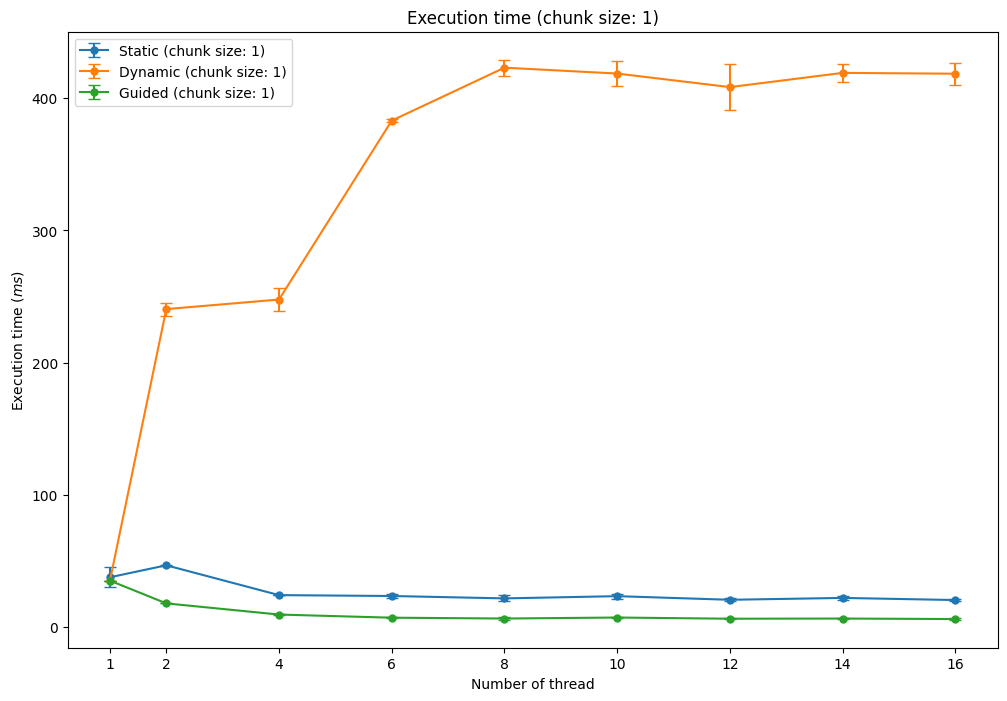

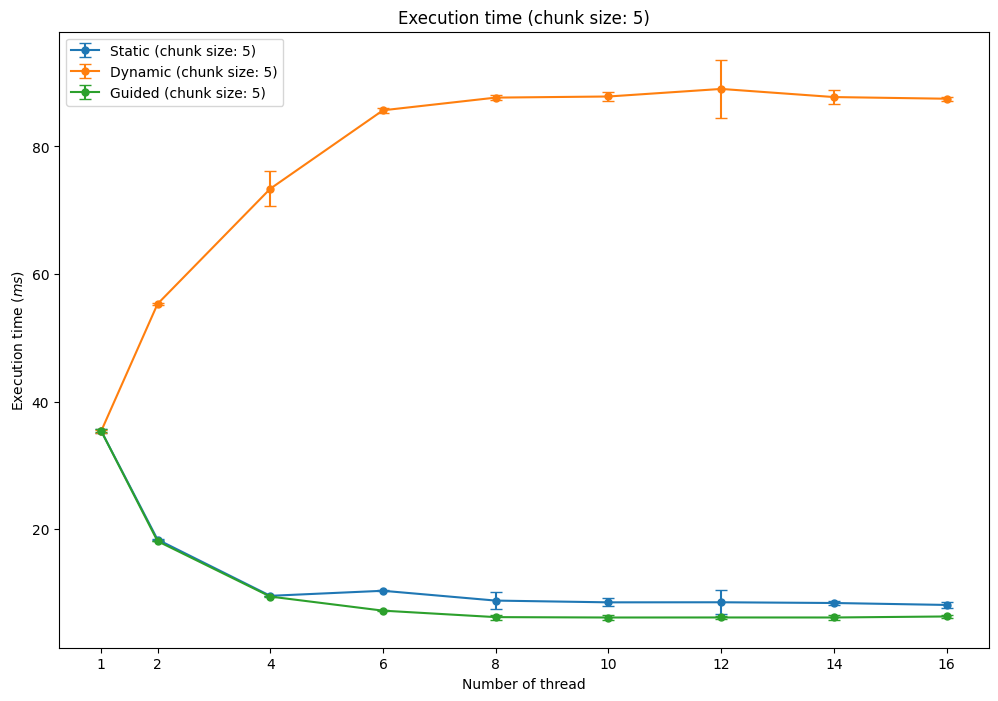

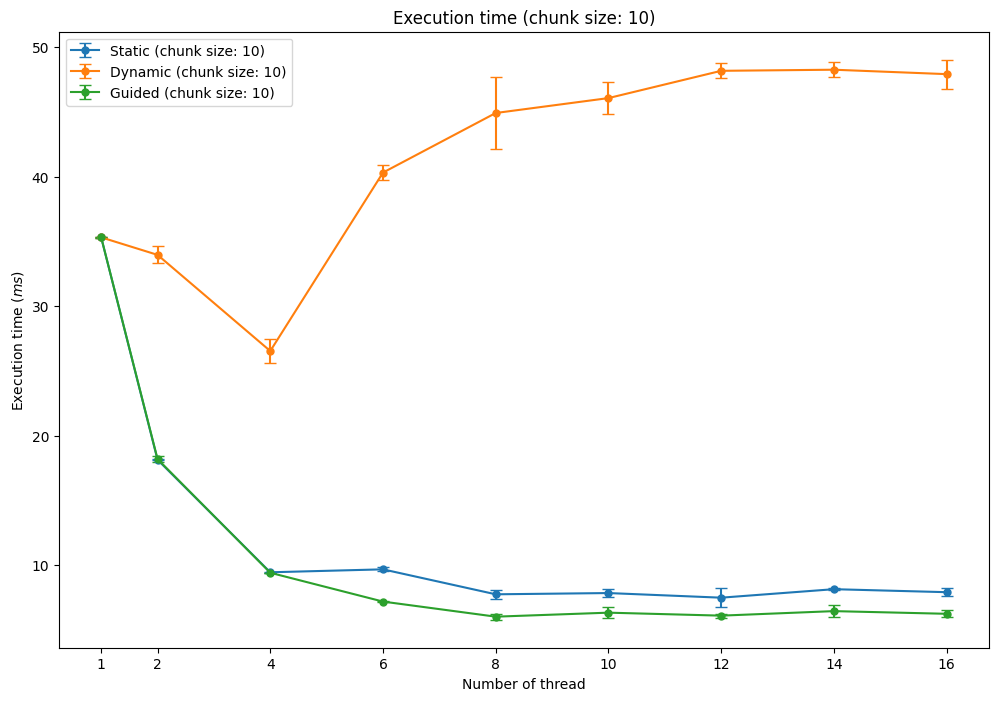

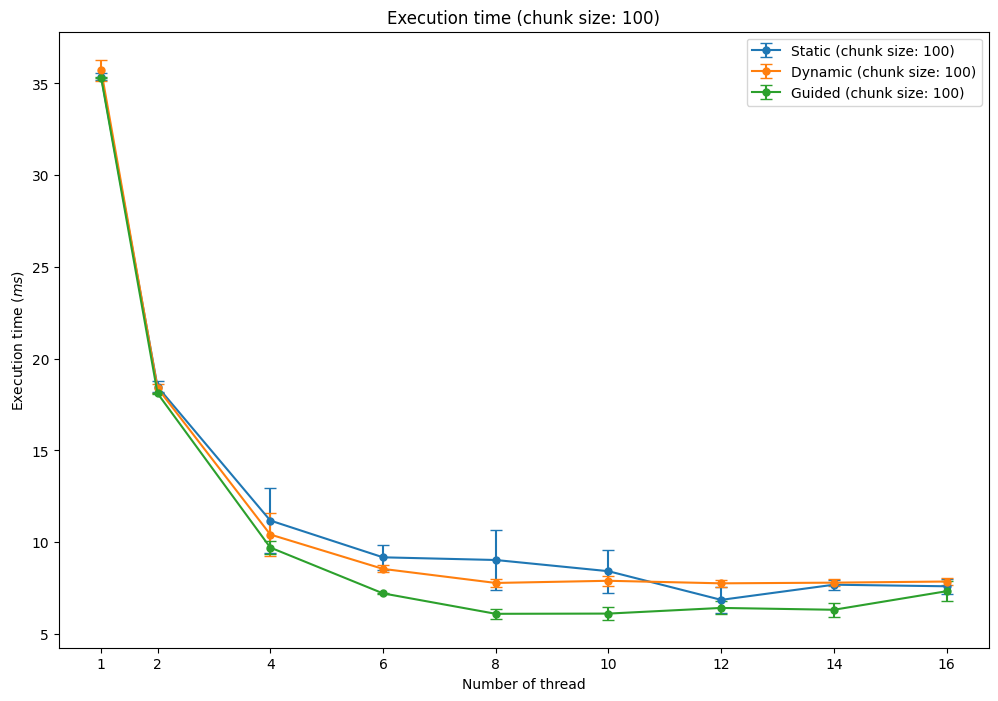

In [11]:
thread_list = [1,2,4,6,8,10,12,14,16]
label_list = [
    'Static', 
    'Dynamic', 
    'Guided',
]
for chunk_idx, chunk_size in enumerate([1,5,10,100]):
    plt.figure(figsize=(12,8))
    for sched_idx, scheduling_type in enumerate(range(1,4)):
        plt.errorbar(
            x=thread_list, 
            y=exec_time_mean[sched_idx, chunk_idx, :], 
            yerr=exec_time_std[sched_idx, chunk_idx, :], 
            fmt='o-',
            capsize=4,
            markersize=5,
            label=label_list[sched_idx]+f' (chunk size: {chunk_size})'
        )
    plt.legend()
    plt.xticks(thread_list)
    plt.xlabel('Number of thread')
    plt.ylabel('Execution time $(ms)$')
    plt.title(f'Execution time (chunk size: {chunk_size})')
    plt.show()

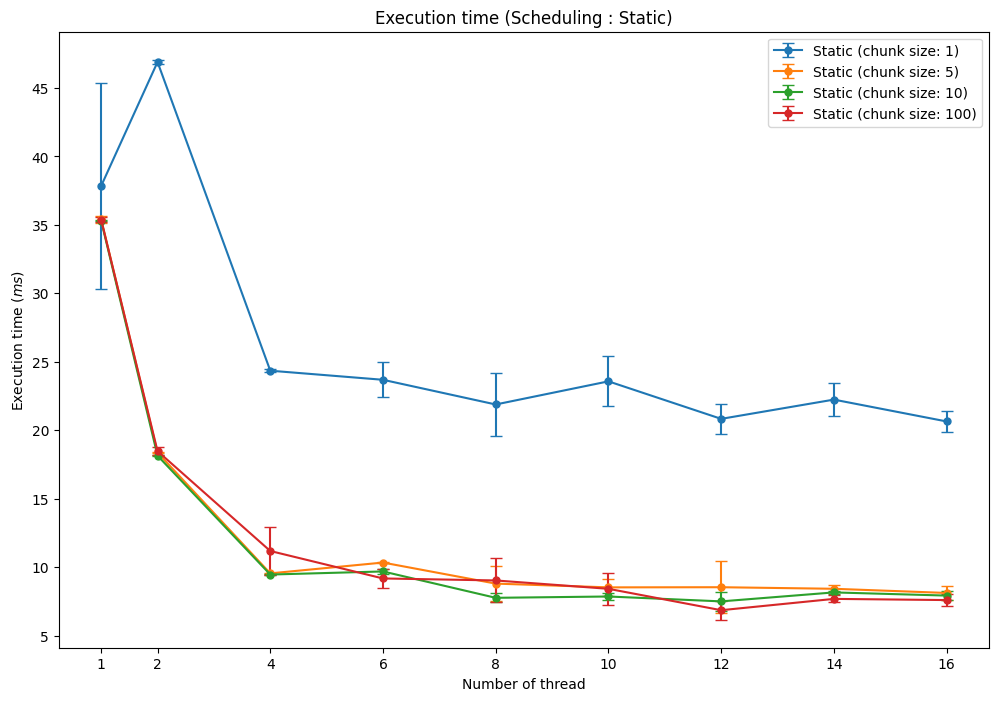

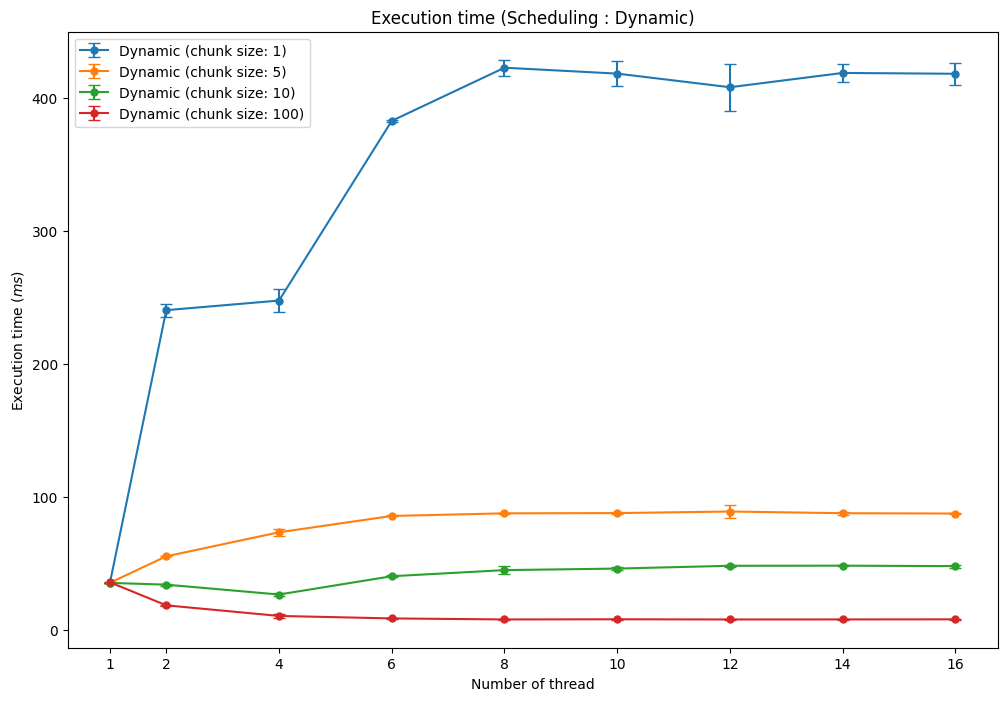

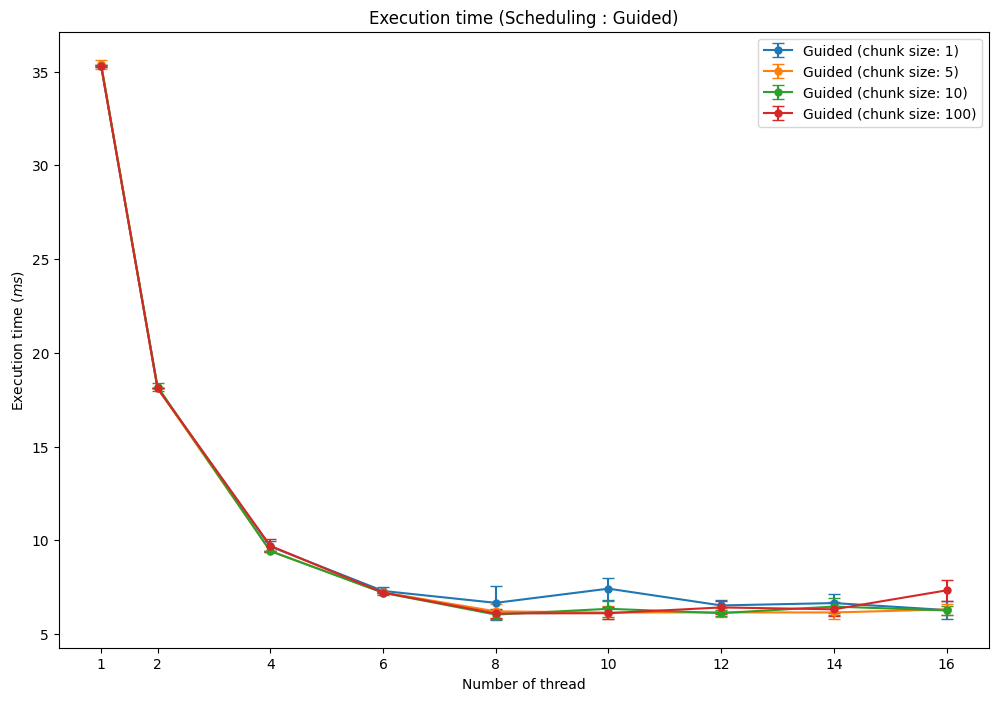

In [12]:
thread_list = [1,2,4,6,8,10,12,14,16]
label_list = [
    'Static', 
    'Dynamic', 
    'Guided',
]
for sched_idx, scheduling_type in enumerate(range(1,4)):
    plt.figure(figsize=(12,8))
    for chunk_idx, chunk_size in enumerate([1,5,10,100]):
        plt.errorbar(
            x=thread_list, 
            y=exec_time_mean[sched_idx, chunk_idx, :], 
            yerr=exec_time_std[sched_idx, chunk_idx, :], 
            fmt='o-',
            capsize=4,
            markersize=5,
            label=label_list[sched_idx]+f' (chunk size: {chunk_size})'
        )
    plt.legend()
    plt.xticks(thread_list)
    plt.xlabel('Number of thread')
    plt.ylabel('Execution time $(ms)$')
    plt.title(f'Execution time (Scheduling : {label_list[sched_idx]})')
    plt.show()

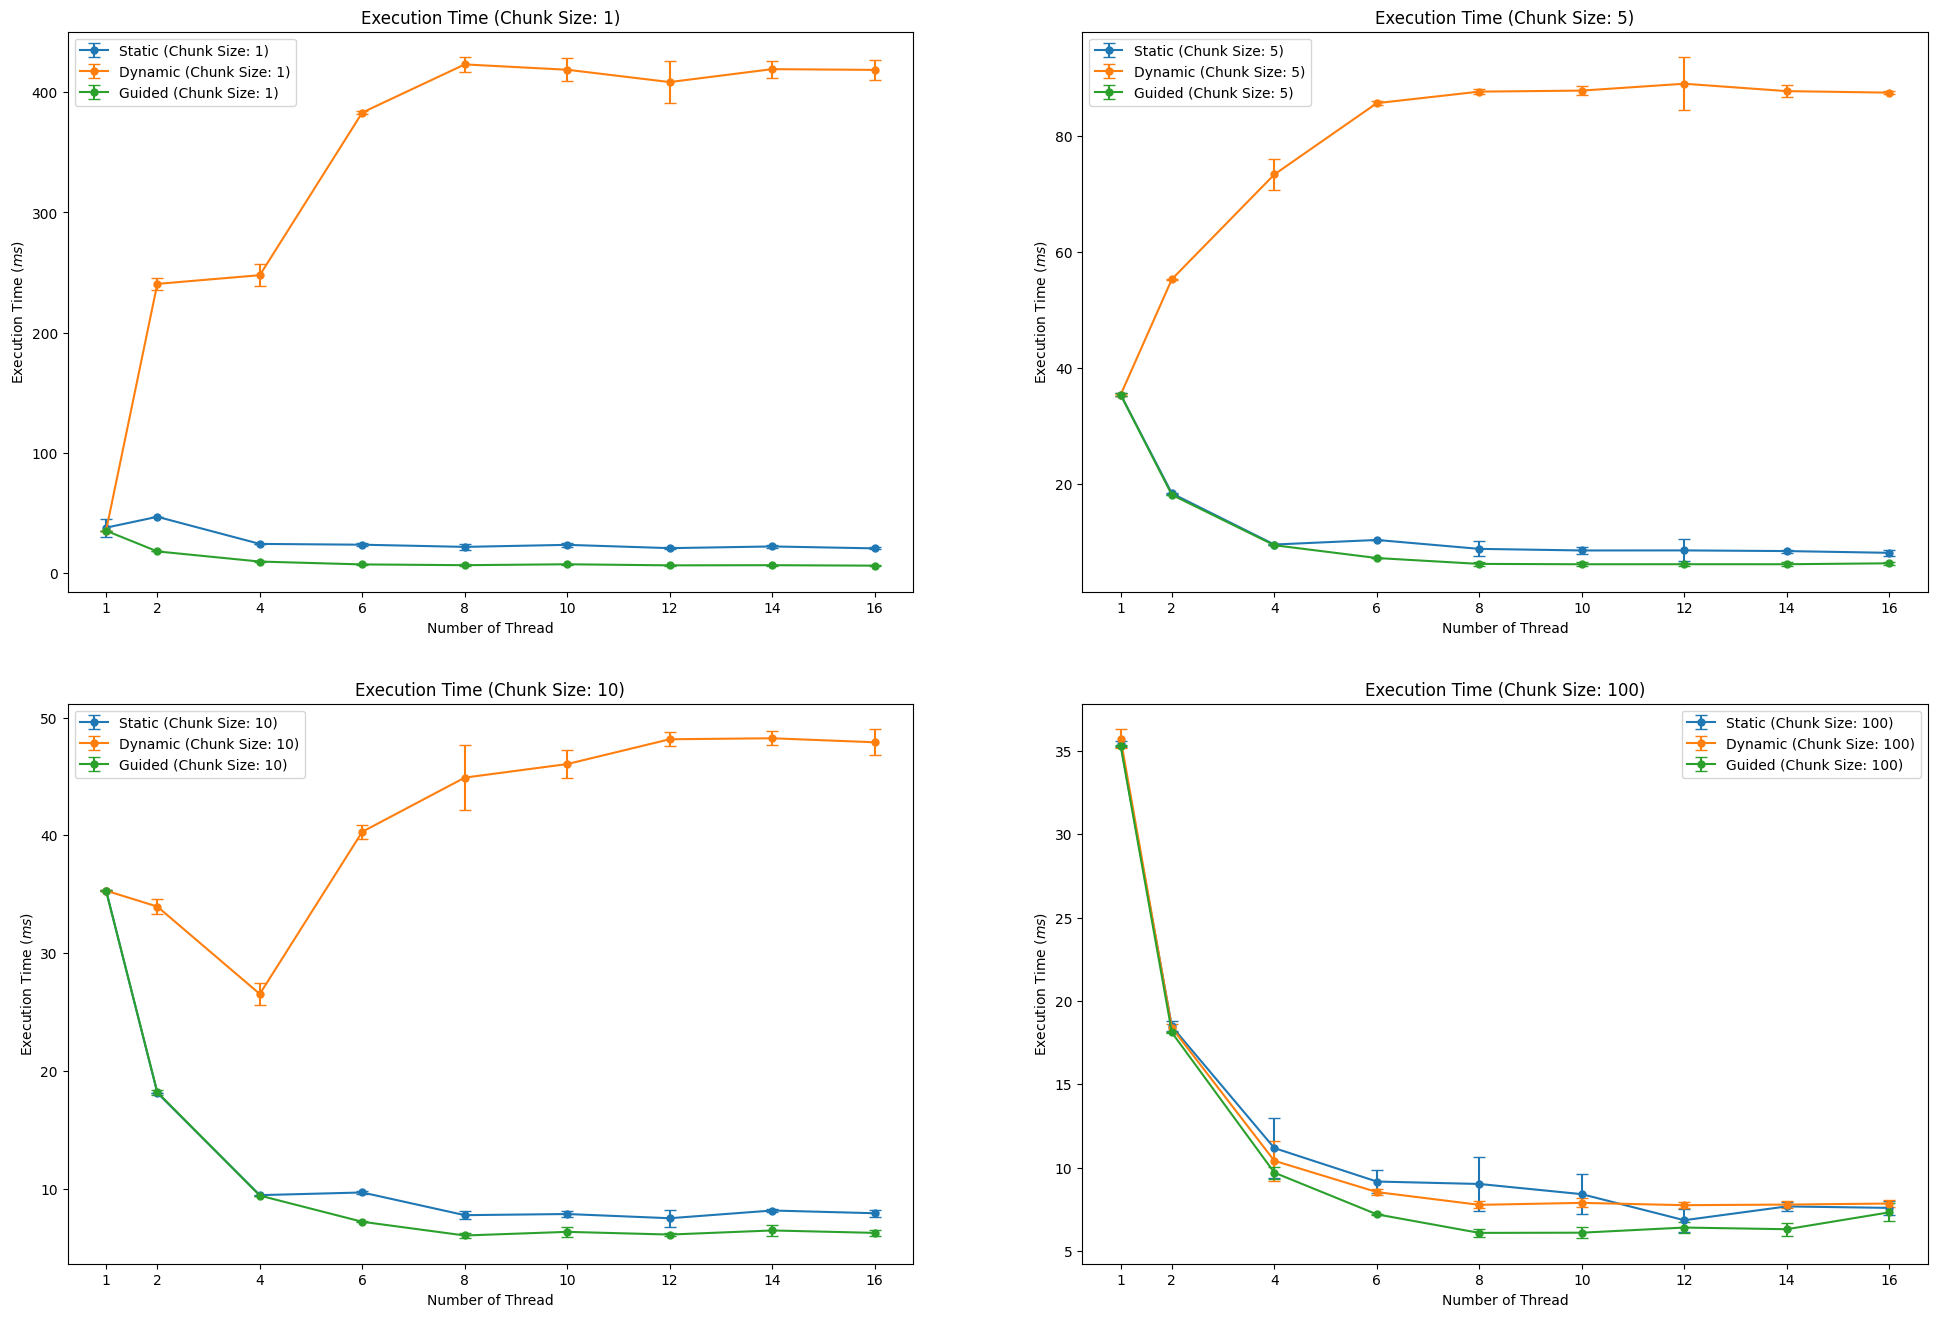

In [32]:
thread_list = [1,2,4,6,8,10,12,14,16]
label_list = [
    'Static', 
    'Dynamic', 
    'Guided',
]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24,16))
for chunk_idx, chunk_size in enumerate([1,5,10,100]):
    for sched_idx, scheduling_type in enumerate(range(1,4)):
        axes[chunk_idx//2,chunk_idx%2].errorbar(
            x=thread_list, 
            y=exec_time_mean[sched_idx, chunk_idx, :], 
            yerr=exec_time_std[sched_idx, chunk_idx, :], 
            fmt='o-',
            capsize=4,
            markersize=5,
            label=label_list[sched_idx]+f' (Chunk Size: {chunk_size})'
        )
    axes[chunk_idx//2,chunk_idx%2].legend()
    axes[chunk_idx//2,chunk_idx%2].set_xticks(thread_list)
    axes[chunk_idx//2,chunk_idx%2].set_xlabel('Number of Thread')
    axes[chunk_idx//2,chunk_idx%2].set_ylabel('Execution Time $(ms)$')
    axes[chunk_idx//2,chunk_idx%2].set_title(f'Execution Time (Chunk Size: {chunk_size})')
plt.show()

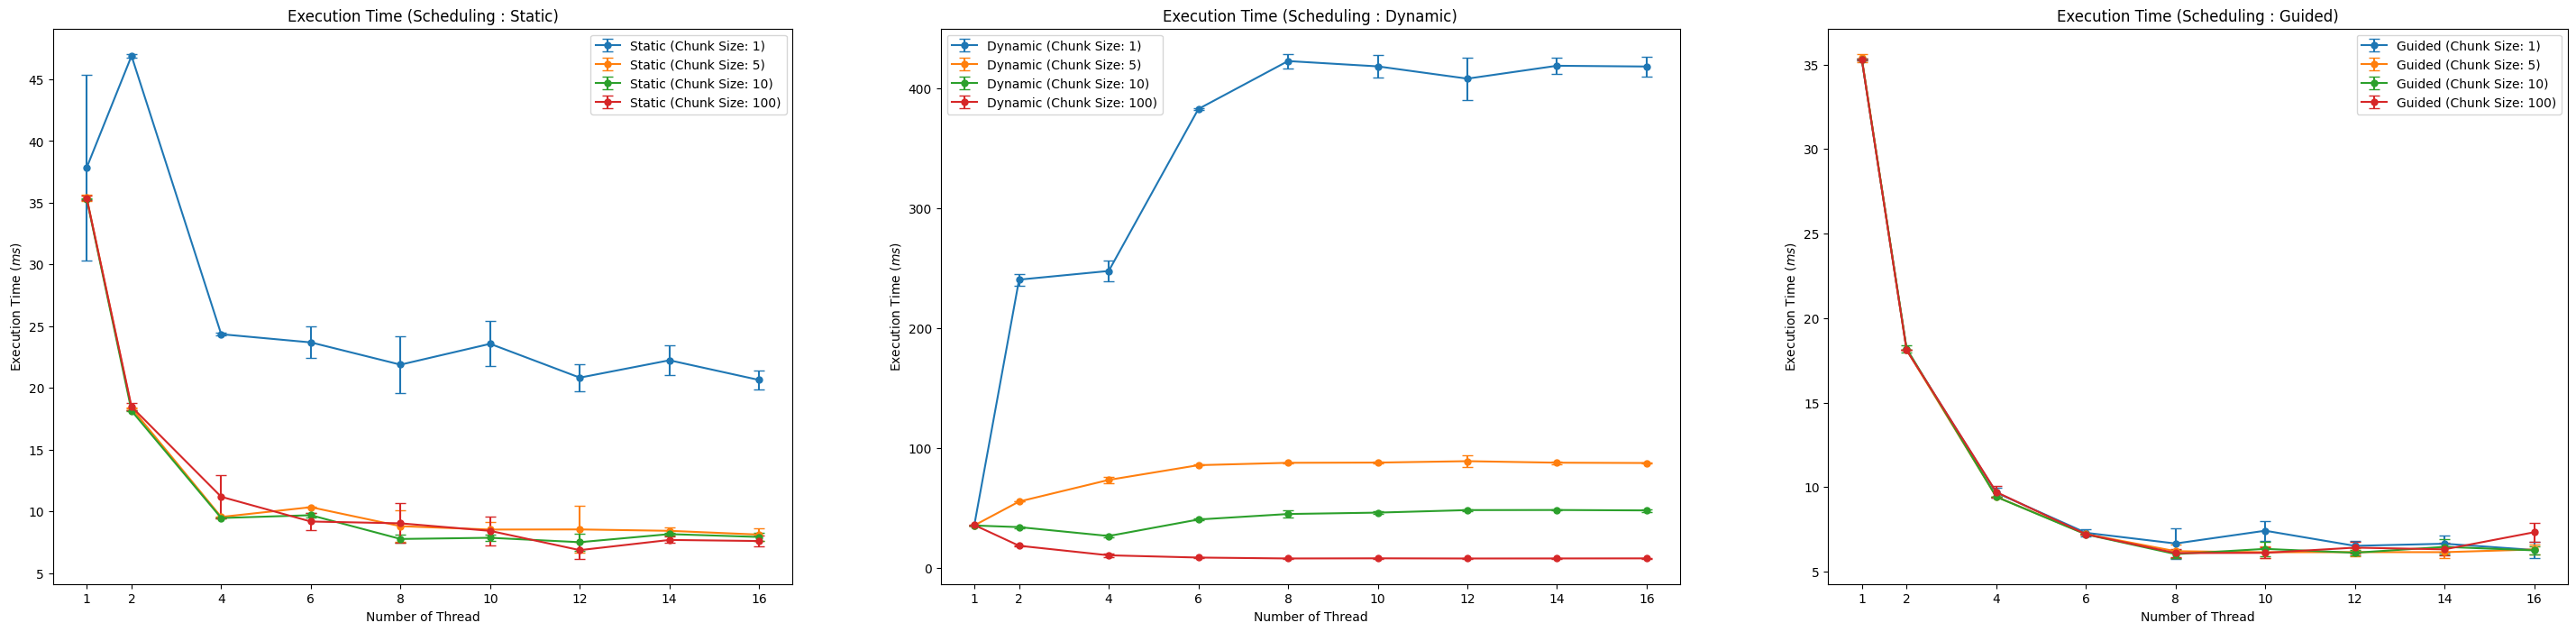

In [33]:
thread_list = [1,2,4,6,8,10,12,14,16]
label_list = [
    'Static', 
    'Dynamic', 
    'Guided',
]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(36,8))
for sched_idx, scheduling_type in enumerate(range(1,4)):
    for chunk_idx, chunk_size in enumerate([1,5,10,100]):
        axes[sched_idx].errorbar(
            x=thread_list, 
            y=exec_time_mean[sched_idx, chunk_idx, :], 
            yerr=exec_time_std[sched_idx, chunk_idx, :], 
            fmt='o-',
            capsize=4,
            markersize=5,
            label=label_list[sched_idx]+f' (Chunk Size: {chunk_size})'
        )
    axes[sched_idx].legend()
    axes[sched_idx].set_xticks(thread_list)
    axes[sched_idx].set_xlabel('Number of Thread')
    axes[sched_idx].set_ylabel('Execution Time $(ms)$')
    axes[sched_idx].set_title(f'Execution Time (Scheduling : {label_list[sched_idx]})')
plt.show()

In [34]:
perf_time_list = 1. / exec_time_list
perf_time_list.shape

(3, 4, 9, 10)

In [35]:
perf_time_mean = np.mean(perf_time_list, axis=3)
perf_time_std = np.std(perf_time_list, axis=3)
perf_time_mean.shape, perf_time_std.shape

((3, 4, 9), (3, 4, 9))

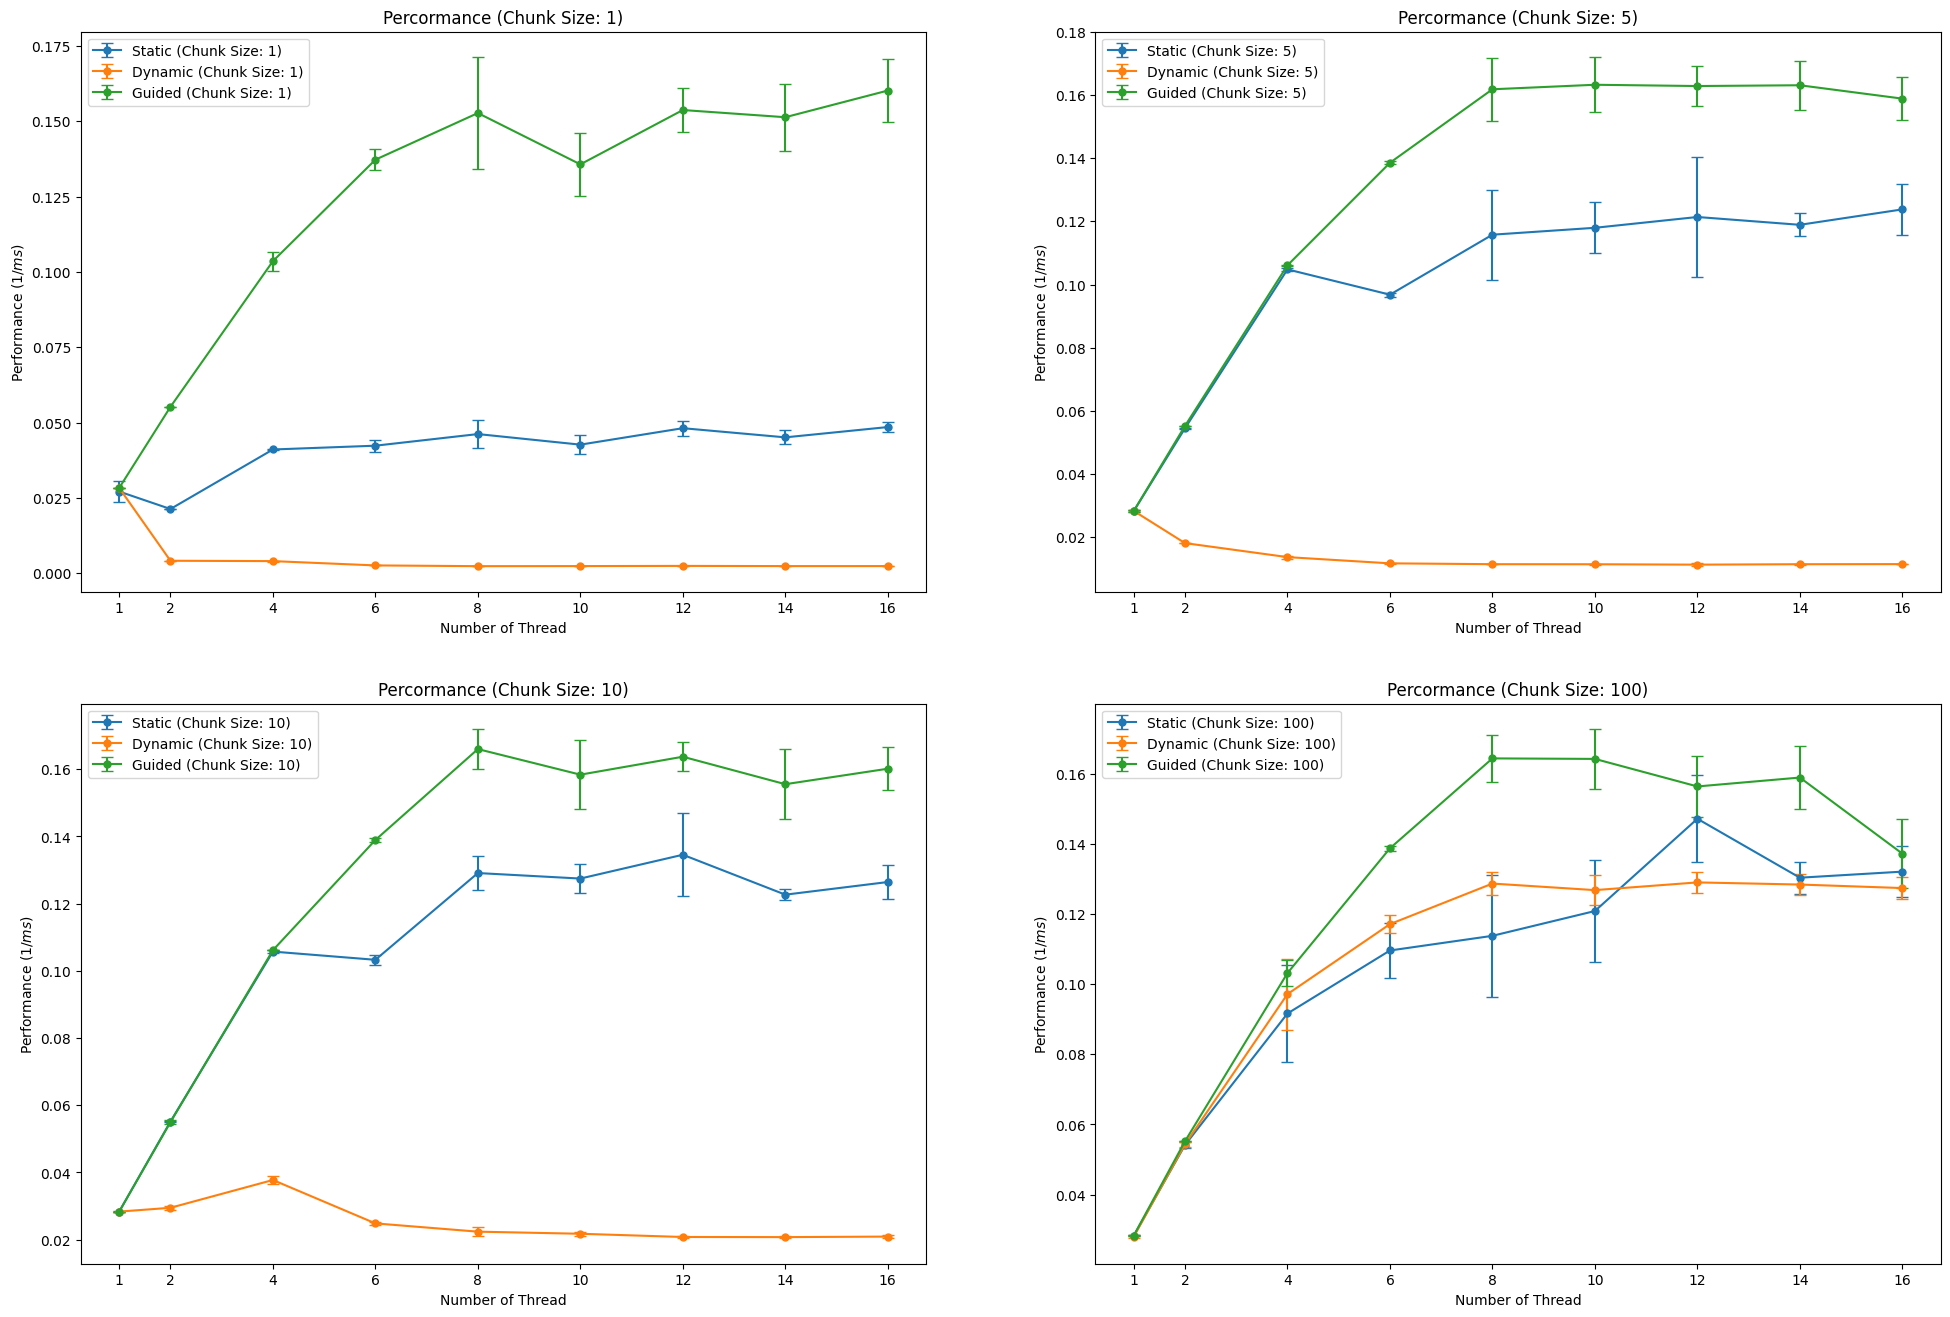

In [36]:
thread_list = [1,2,4,6,8,10,12,14,16]
label_list = [
    'Static', 
    'Dynamic', 
    'Guided',
]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24,16))
for chunk_idx, chunk_size in enumerate([1,5,10,100]):
    for sched_idx, scheduling_type in enumerate(range(1,4)):
        axes[chunk_idx//2,chunk_idx%2].errorbar(
            x=thread_list, 
            y=perf_time_mean[sched_idx, chunk_idx, :], 
            yerr=perf_time_std[sched_idx, chunk_idx, :], 
            fmt='o-',
            capsize=4,
            markersize=5,
            label=label_list[sched_idx]+f' (Chunk Size: {chunk_size})'
        )
    axes[chunk_idx//2,chunk_idx%2].legend()
    axes[chunk_idx//2,chunk_idx%2].set_xticks(thread_list)
    axes[chunk_idx//2,chunk_idx%2].set_xlabel('Number of Thread')
    axes[chunk_idx//2,chunk_idx%2].set_ylabel('Performance $(1/ms)$')
    axes[chunk_idx//2,chunk_idx%2].set_title(f'Percormance (Chunk Size: {chunk_size})')
plt.show()

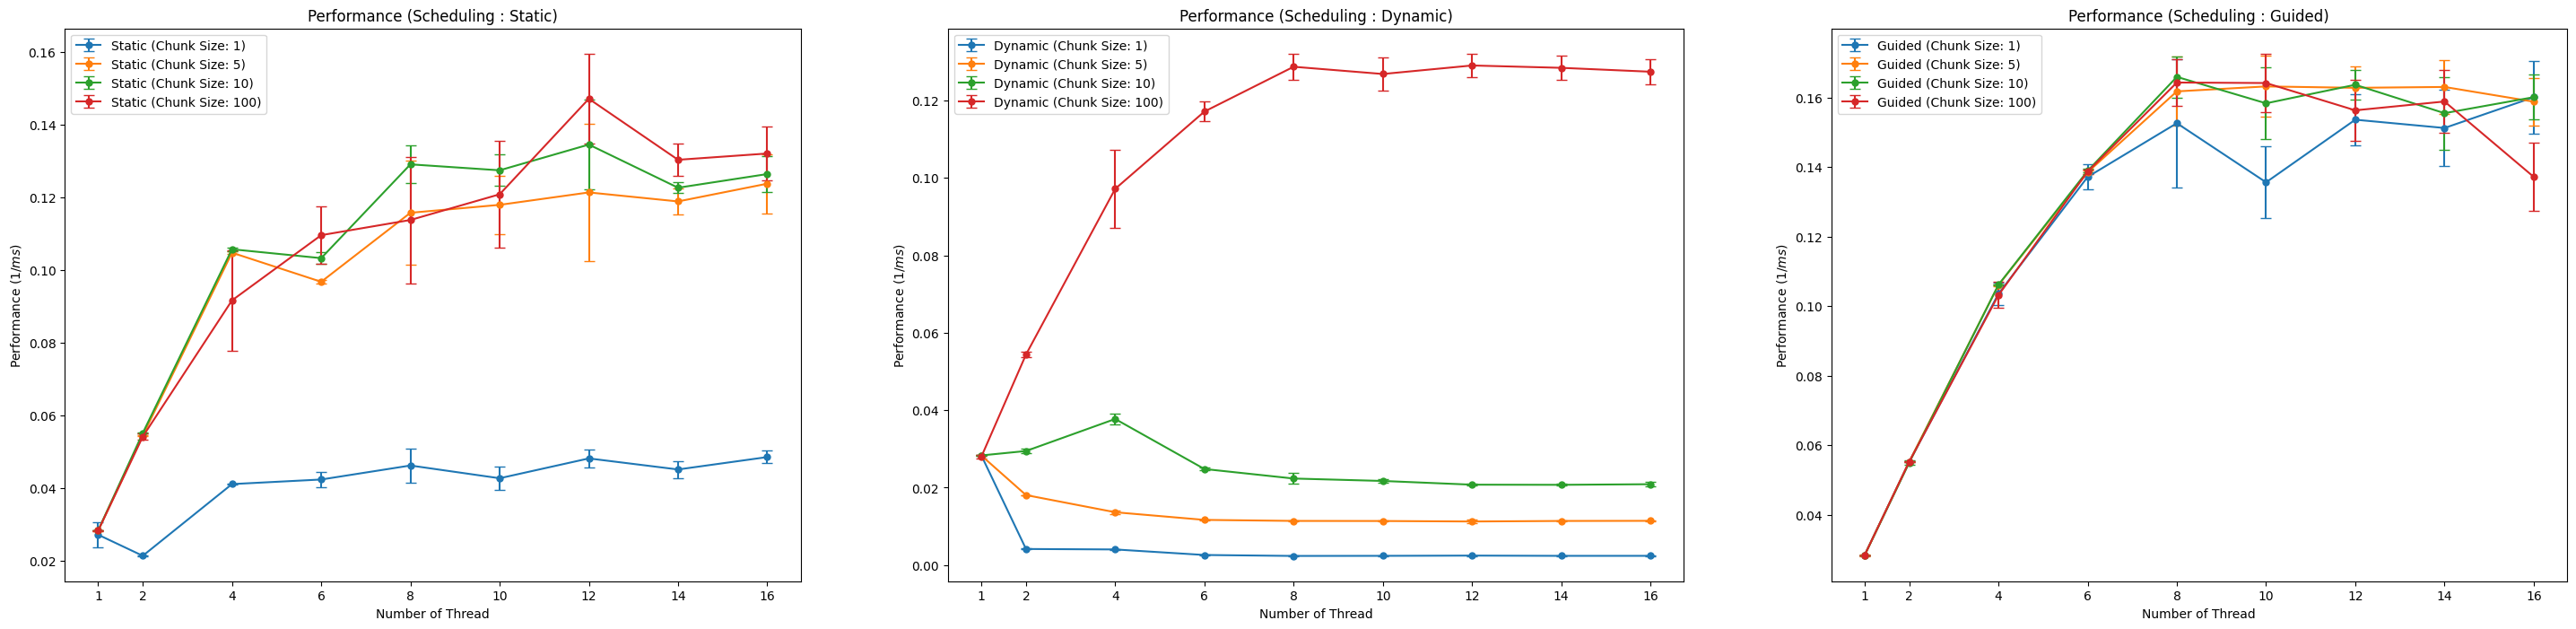

In [37]:
thread_list = [1,2,4,6,8,10,12,14,16]
label_list = [
    'Static', 
    'Dynamic', 
    'Guided',
]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(36,8))
for sched_idx, scheduling_type in enumerate(range(1,4)):
    for chunk_idx, chunk_size in enumerate([1,5,10,100]):
        axes[sched_idx].errorbar(
            x=thread_list, 
            y=perf_time_mean[sched_idx, chunk_idx, :], 
            yerr=perf_time_std[sched_idx, chunk_idx, :], 
            fmt='o-',
            capsize=4,
            markersize=5,
            label=label_list[sched_idx]+f' (Chunk Size: {chunk_size})'
        )
    axes[sched_idx].legend()
    axes[sched_idx].set_xticks(thread_list)
    axes[sched_idx].set_xlabel('Number of Thread')
    axes[sched_idx].set_ylabel('Performance $(1/ms)$')
    axes[sched_idx].set_title(f'Performance (Scheduling : {label_list[sched_idx]})')
plt.show()

In [38]:
exec_time_mean

array([[[ 37.8461,  46.8988,  24.3494,  23.6849,  21.881 ,  23.5707,
          20.8306,  22.2372,  20.6411],
        [ 35.4016,  18.3613,   9.5432,  10.3336,   8.7958,   8.5212,
           8.532 ,   8.4181,   8.1129],
        [ 35.3046,  18.14  ,   9.4579,   9.6841,   7.7582,   7.8543,
           7.4974,   8.1527,   7.9212],
        [ 35.375 ,  18.472 ,  11.1781,   9.1725,   9.0264,   8.4157,
           6.8534,   7.6796,   7.5932]],

       [[ 35.3322, 240.559 , 247.7957, 383.0341, 423.0457, 418.6088,
         408.3619, 419.1155, 418.4885],
        [ 35.3603,  55.2999,  73.3646,  85.6627,  87.6504,  87.825 ,
          89.0107,  87.7361,  87.4747],
        [ 35.3056,  33.9541,  26.5344,  40.3051,  44.9028,  46.0538,
          48.1588,  48.2437,  47.9024],
        [ 35.7212,  18.3933,  10.4156,   8.5418,   7.7752,   7.8939,
           7.7548,   7.7914,   7.8533]],

       [[ 35.3105,  18.1108,   9.6657,   7.2931,   6.6585,   7.416 ,
           6.5209,   6.6462,   6.2761],
        [ 35.39

In [39]:
perf_time_mean

array([[[0.02712064, 0.02132277, 0.04106971, 0.04233131, 0.04618477,
         0.04267625, 0.04813753, 0.04509577, 0.04850948],
        [0.02824895, 0.05446257, 0.10478793, 0.09677542, 0.1157781 ,
         0.11796117, 0.12138253, 0.11890557, 0.12379145],
        [0.02832496, 0.0551269 , 0.1057336 , 0.10328684, 0.1291147 ,
         0.12747518, 0.13456278, 0.12267753, 0.12644179],
        [0.02826928, 0.05415035, 0.09165278, 0.10961399, 0.11379596,
         0.12086746, 0.14717086, 0.13036949, 0.13209999]],

       [[0.02830284, 0.00415867, 0.00404089, 0.00261075, 0.0023643 ,
         0.00239018, 0.00245356, 0.00238667, 0.0023905 ],
        [0.02828131, 0.01808326, 0.01364867, 0.01167391, 0.01140917,
         0.01138711, 0.01126096, 0.0113994 , 0.01143201],
        [0.02832414, 0.02946289, 0.03773387, 0.0248159 , 0.02235605,
         0.02172862, 0.02076766, 0.02073111, 0.02088737],
        [0.02800162, 0.05437681, 0.0971723 , 0.11712926, 0.12869917,
         0.1268299 , 0.1290275 , 0.12842